# Cifar 10 dataset from keras

<img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" width="300" height="200" />

# Plan :
 > Importing libraries
 
 > Data analysis
 
 > Plotting
 
 > Building CNN model
 
 > Deploying model

# 1 

In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from keras.callbacks import Callback
import random
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 2

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [15]:
print("train_data : ",x_train.shape,y_train.shape,"\n\n",'test_data:',x_test.shape,y_test.shape)

train_data :  (50000, 32, 32, 3) (50000, 1) 

 test_data: (10000, 32, 32, 3) (10000, 1)


# 3

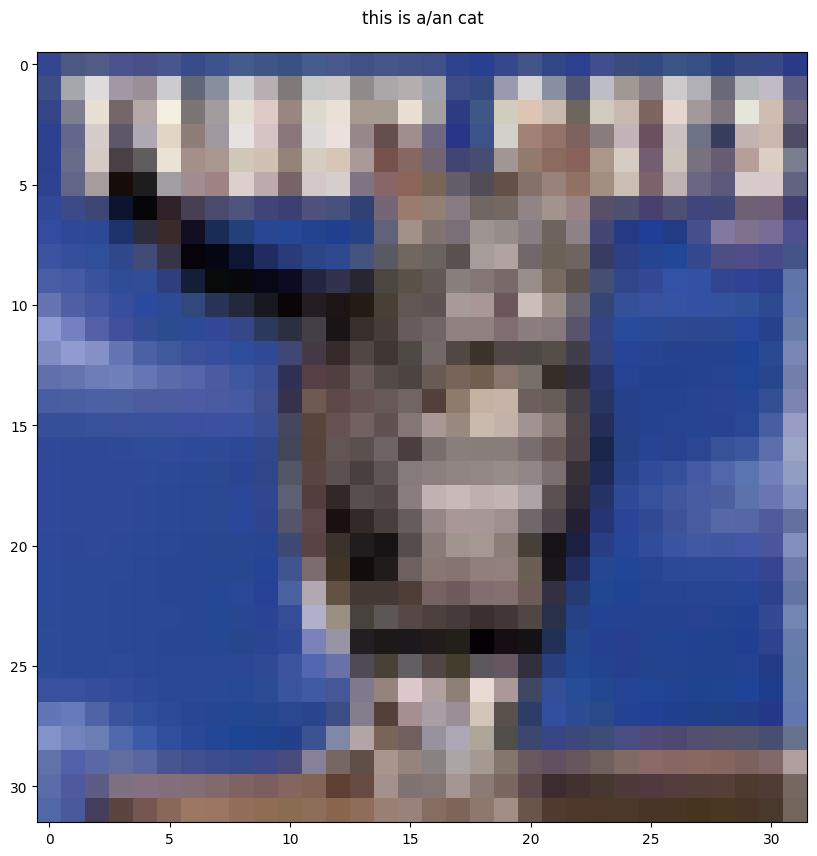

In [6]:
label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(22,10))
z = random.randint(1,len(y_train))
plt.title(f"this is a/an {label[y_train[z][0]]}\n")
print()
plt.imshow(x_train[z])
plt.show()

# 4

In [19]:
model =Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomWidth(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
])
# We use Random function which multiplies our datas by changing the position of photo like zooming it or rotating

In [20]:
# Callback function is used to avoid time wasting.It stops the training of our model if it's loss or accuracy reaches the point
# which we need we ourselves give the  border to stop
class myCallback(Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get("loss")<0.1):
            print("\n accuracy reached the highest point,cancelling session")
            self.model.stop_training=True
callback = myCallback()

In [21]:
# I used CNN model 
model.add(Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((3,3)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),padding='same'),
    Activation('relu'),
    BatchNormalization(-1),
    
    Conv2D(64,(3,3),padding='same'),
    Activation('relu'),
    BatchNormalization(-1),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Conv2D(128,(3,3),padding='same'),
    Activation('relu'),
    BatchNormalization(),
    
    Conv2D(128,(3,3),padding='same'),
    Activation('relu'),
    BatchNormalization(-1),
    MaxPooling2D((2,2)),
    
    Conv2D(256,(3,3),padding='same'),
    Activation('relu'),
    BatchNormalization(),
    
    Flatten(),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation("softmax")
]))
l_r=0.001 
batch_size=64
epochs=20
op=Adam(learning_rate=l_r) # to minimize the loss
model.compile(optimizer=op,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs, batch_size=batch_size,callbacks=callback)

Epoch 1/20
782/782 [==============================] - 73s 90ms/step - loss: 1.5030 - accuracy: 0.4514 - val_loss: 1.5648 - val_accuracy: 0.4834
Epoch 2/20
782/782 [==============================] - 63s 80ms/step - loss: 1.1516 - accuracy: 0.5951 - val_loss: 1.7286 - val_accuracy: 0.4762
Epoch 3/20
782/782 [==============================] - 64s 82ms/step - loss: 0.9991 - accuracy: 0.6493 - val_loss: 1.0589 - val_accuracy: 0.6460
Epoch 4/20
782/782 [==============================] - 63s 80ms/step - loss: 0.9054 - accuracy: 0.6855 - val_loss: 1.0159 - val_accuracy: 0.6693
Epoch 5/20
782/782 [==============================] - 66s 84ms/step - loss: 0.8323 - accuracy: 0.7121 - val_loss: 0.8520 - val_accuracy: 0.7142
Epoch 6/20
782/782 [==============================] - 65s 83ms/step - loss: 0.7833 - accuracy: 0.7299 - val_loss: 0.8751 - val_accuracy: 0.7150
Epoch 7/20
782/782 [==============================] - 67s 86ms/step - loss: 0.7293 - accuracy: 0.7479 - val_loss: 0.7880 - val_accuracy:

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6435 - accuracy: 0.7948


[0.6435367465019226, 0.7947999835014343]

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_width_2 (RandomWidth  (None, 32, None, 3)      0         
 )                                                               
                                                                 
 random_zoom_2 (RandomZoom)  (None, 32, None, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 10)                881578    
                                                                 
Total params: 881,578
Trainable params: 880,234
Non-trainable params: 1,344
_________________________________________________________________


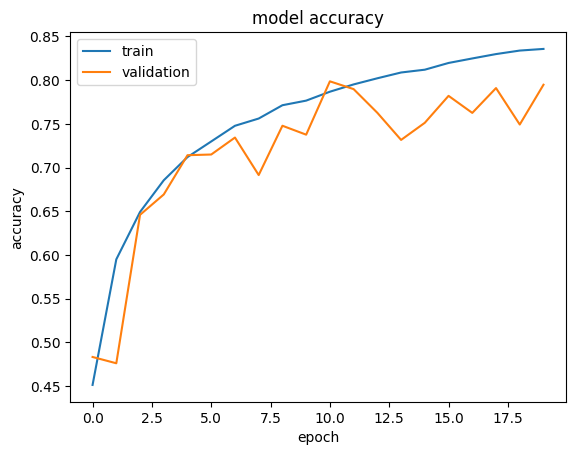

In [25]:
def plotting(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="best")
    plt.show()
plotting(hist)

In [26]:
model.save("cifar10env.model",save_format = 'h5')